In [20]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [21]:
!pip install numpy pandas requests

In [22]:
import requests
import pandas as pd
df = pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9498,2023-11-17,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
9499,2023-11-20,371.220001,378.869995,371.000000,377.440002,377.440002,52465100
9500,2023-11-21,375.670013,376.220001,371.119995,373.070007,373.070007,28423100
9501,2023-11-22,378.000000,379.790009,374.970001,377.850006,377.850006,23345300


In [23]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9498,2023-11-17,369.850006
9499,2023-11-20,377.440002
9500,2023-11-21,373.070007
9501,2023-11-22,377.850006


In [24]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9498    2023-11-17
9499    2023-11-20
9500    2023-11-21
9501    2023-11-22
9502    2023-11-24
Name: Date, Length: 9503, dtype: object

In [25]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [26]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9498,2023-11-17,369.850006
9499,2023-11-20,377.440002
9500,2023-11-21,373.070007
9501,2023-11-22,377.850006


In [27]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-27-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9498   2023-11-17
9499   2023-11-20
9500   2023-11-21
9501   2023-11-22
9502   2023-11-24
Name: Date, Length: 9503, dtype: datetime64[ns]

In [28]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-11-17,369.850006
2023-11-20,377.440002
2023-11-21,373.070007


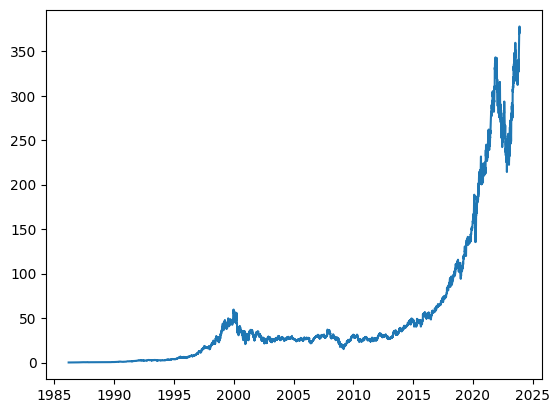

In [29]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [30]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2022-11-25',
                                '2023-11-24',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-11-25,242.050003,245.029999,247.580002,247.490005
1,2022-11-28,245.029999,247.580002,247.490005,241.759995
2,2022-11-29,247.580002,247.490005,241.759995,240.330002
3,2022-11-30,247.490005,241.759995,240.330002,255.139999
4,2022-12-01,241.759995,240.330002,255.139999,254.690002
...,...,...,...,...,...
246,2023-11-17,370.269989,369.670013,376.170013,369.850006
247,2023-11-20,369.670013,376.170013,369.850006,377.440002
248,2023-11-21,376.170013,369.850006,377.440002,373.070007
249,2023-11-22,369.850006,377.440002,373.070007,377.850006


In [31]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((251,), (251, 3, 1), (251,))

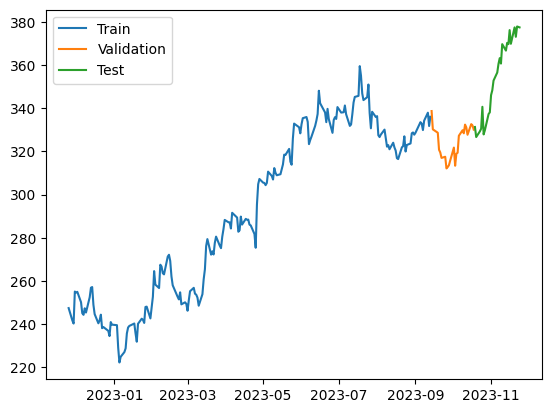

In [32]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 89ms/step - loss: 86521.2969 - mean_absolute_error: 291.6148 - val_loss: 104736.6484 - val_mean_absolute_error: 323.5435
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 86212.4062 - mean_absolute_error: 291.0837 - val_loss: 104440.4062 - val_mean_absolute_error: 323.0854
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 85945.7969 - mean_absolute_error: 290.6248 - val_loss: 104105.2500 - val_mean_absolute_error: 322.5662
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 85588.8828 - mean_absolute_error: 290.0116 - val_loss: 103635.7188 - val_mean_absolute_error: 321.8376
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 85159.8125 - mean_absolute_error: 289.2690 - val_loss: 103136.2578 - val_mean_absolute_error: 321.0607
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 84669.0312 - mean_absolute_error: 288.4223 - val_loss

7/7 [==============================] - 0s 3ms/step


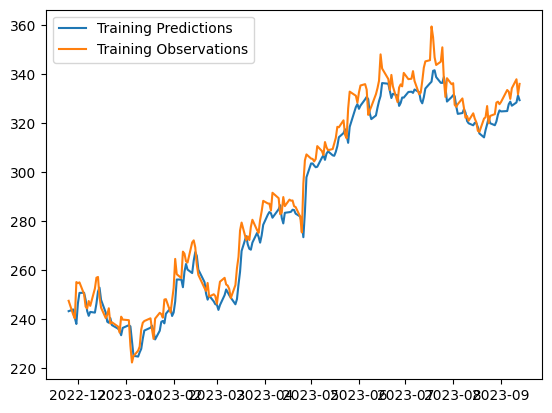

In [34]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 19ms/step


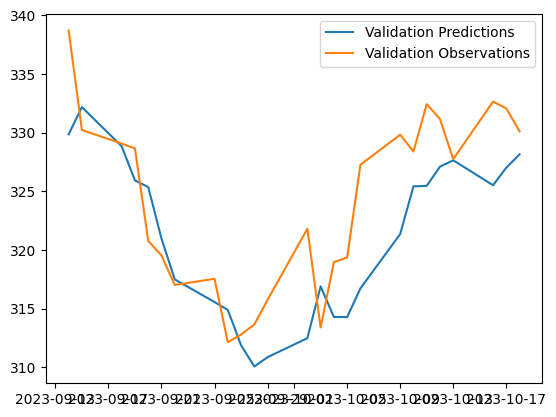

In [35]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 18ms/step


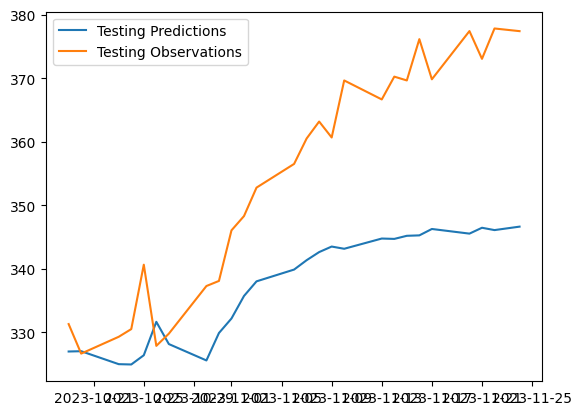

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

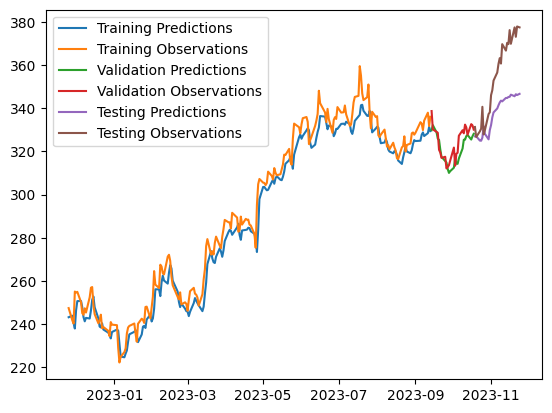

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [38]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


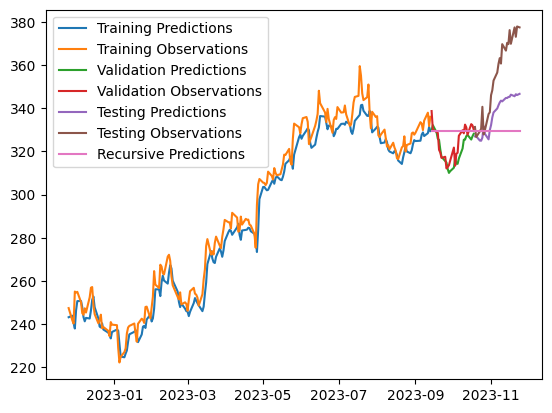

In [39]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])